<a href="https://colab.research.google.com/github/Trapti04/Quantum-Computing-basics/blob/main/fraud_prevention_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
relpath ="/content/drive/MyDrive/QML/"


In [ ]:
data = pd.read_csv(relpath + "train_identity.csv")
data



,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
print(data.describe())

       TransactionID          id_01          id_02         id_03  \
count   1.442330e+05  144233.000000  140872.000000  66324.000000   
mean    3.236329e+06     -10.170502  174716.584708      0.060189   
std     1.788496e+05      14.347949  159651.816856      0.598231   
min     2.987004e+06    -100.000000       1.000000    -13.000000   
25%     3.077142e+06     -10.000000   67992.000000      0.000000   
50%     3.198818e+06      -5.000000  125800.500000      0.000000   
75%     3.392923e+06      -5.000000  228749.000000      0.000000   
max     3.577534e+06       0.000000  999595.000000     10.000000   

              id_04          id_05          id_06        id_07        id_08  \
count  66324.000000  136865.000000  136865.000000  5155.000000  5155.000000   
mean      -0.058938       1.615585      -6.698710    13.285354   -38.600388   
std        0.701015       5.249856      16.491104    11.384207    26.084899   
min      -28.000000     -72.000000    -100.000000   -46.000000  -100.00

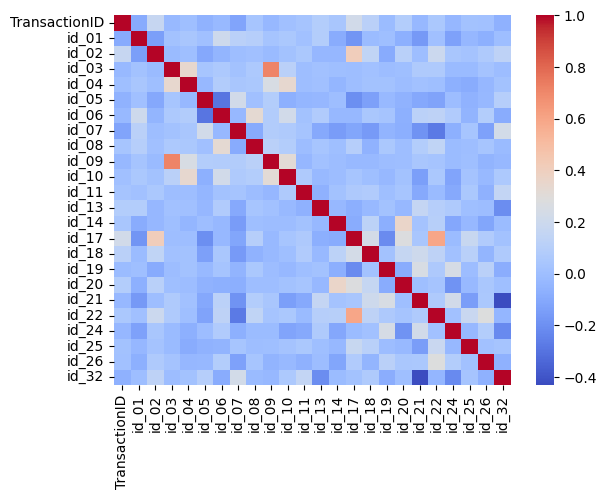

In [ ]:
# check correlation matrix between features
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

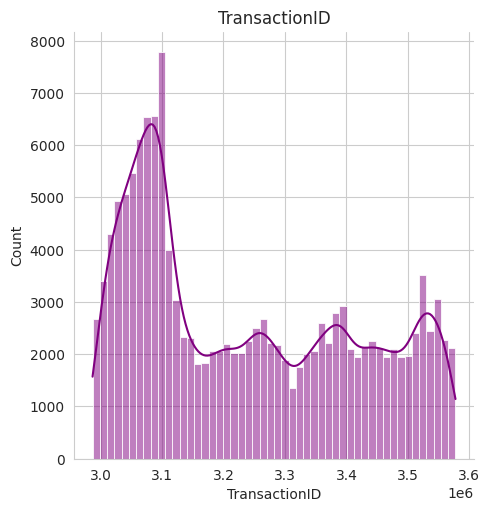

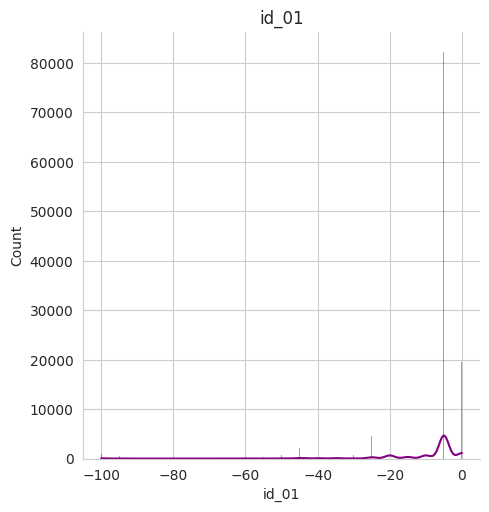

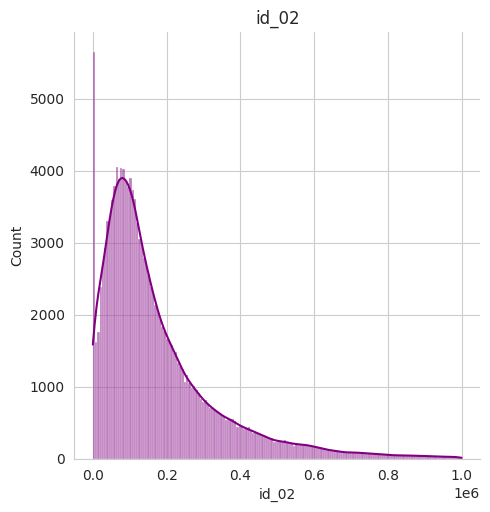

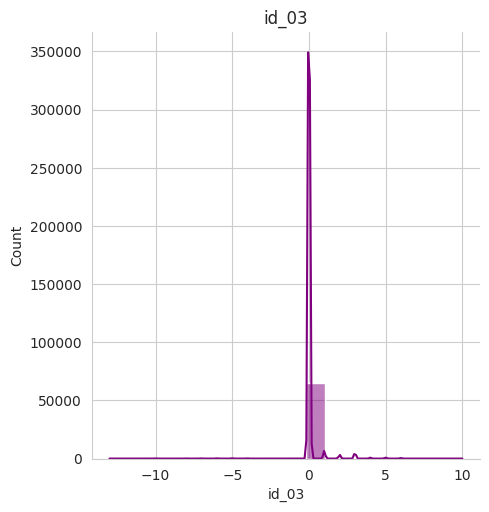

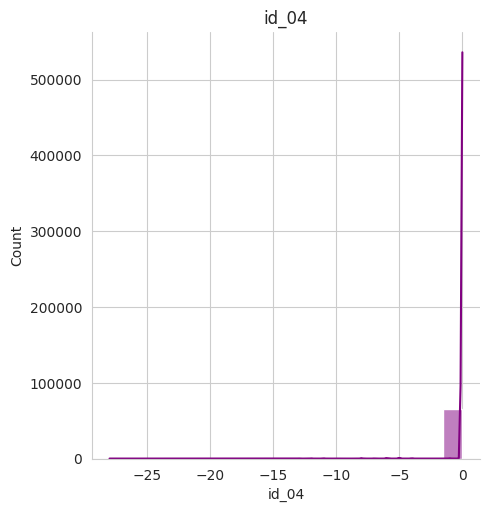

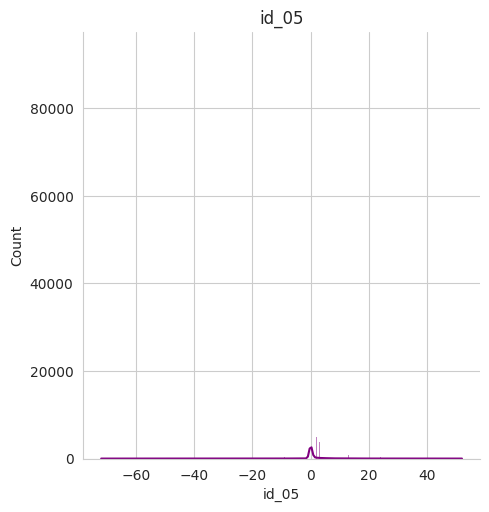

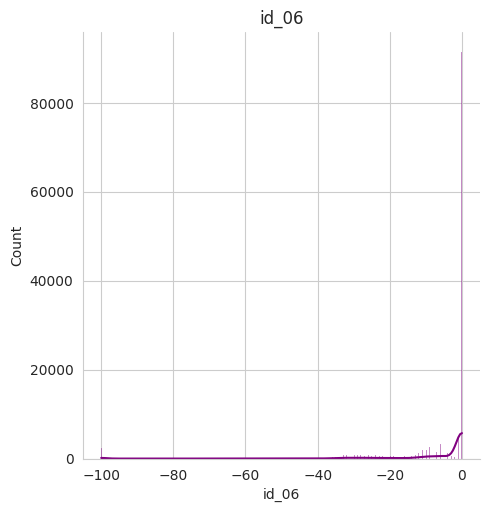

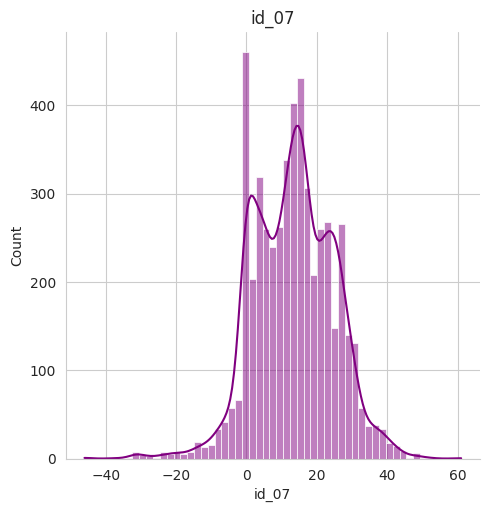

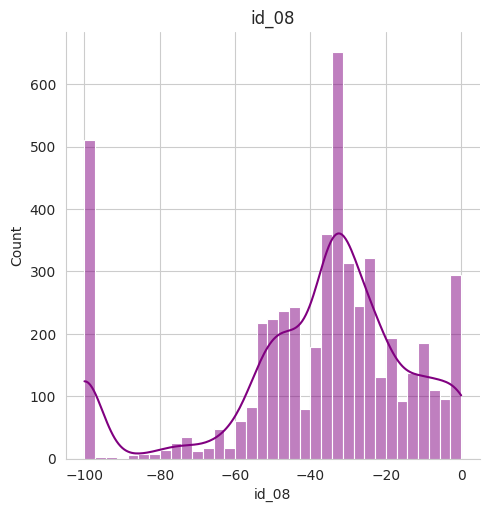

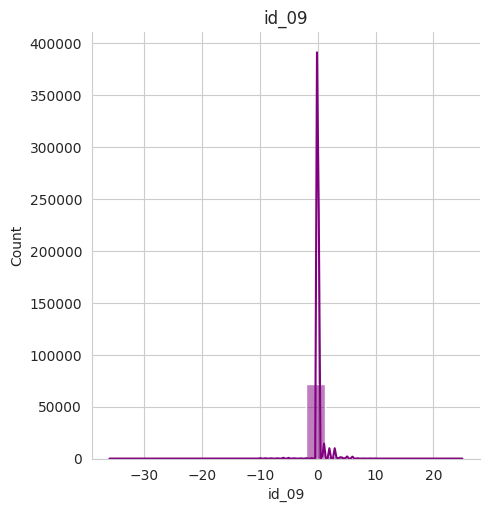

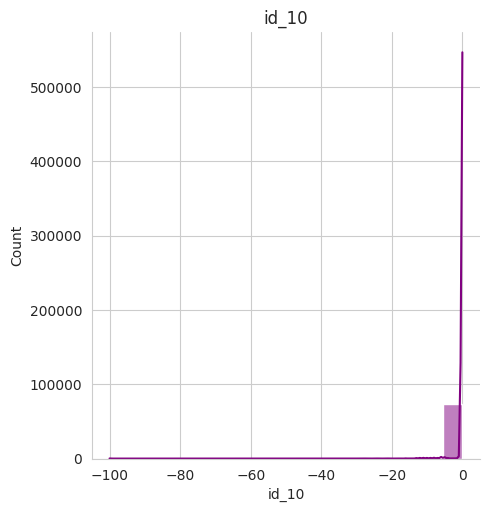

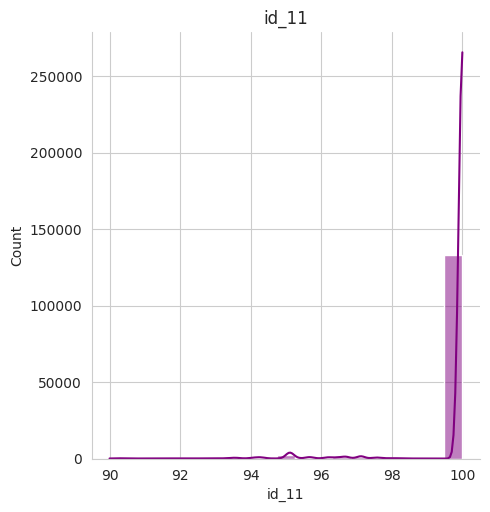

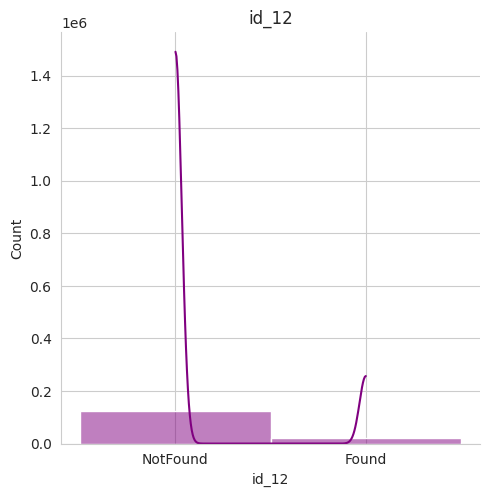

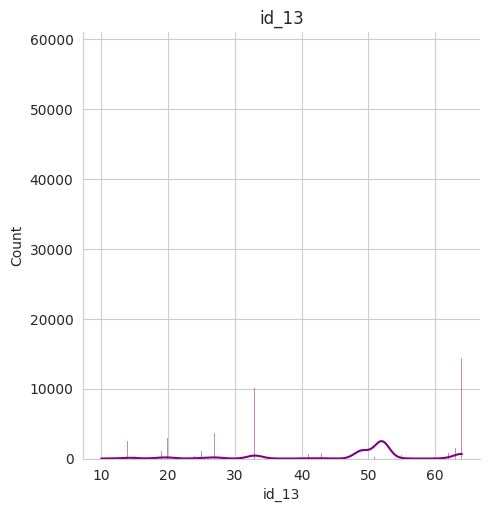

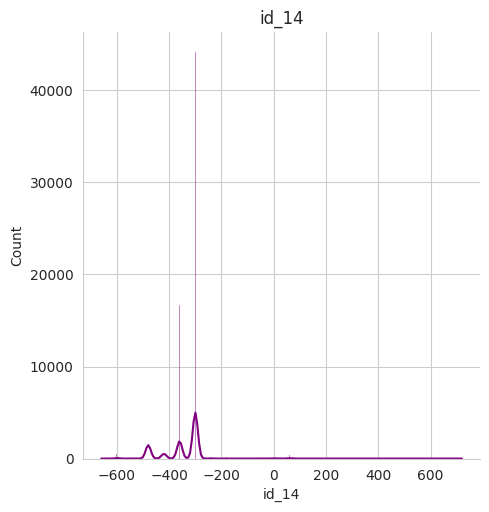

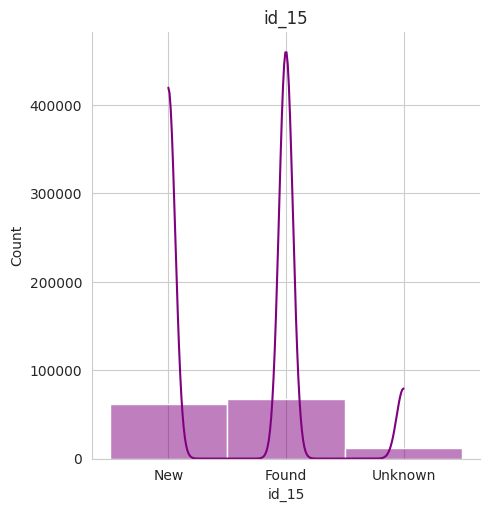

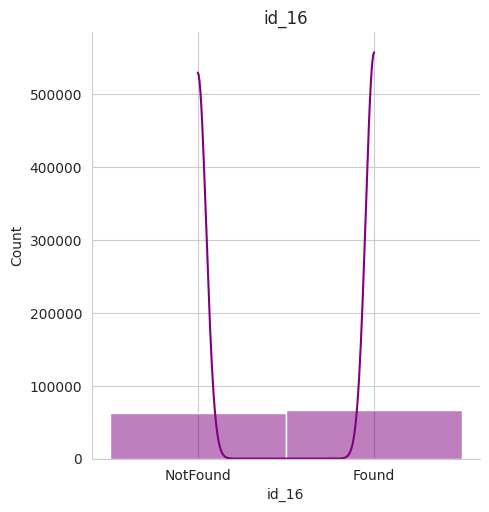

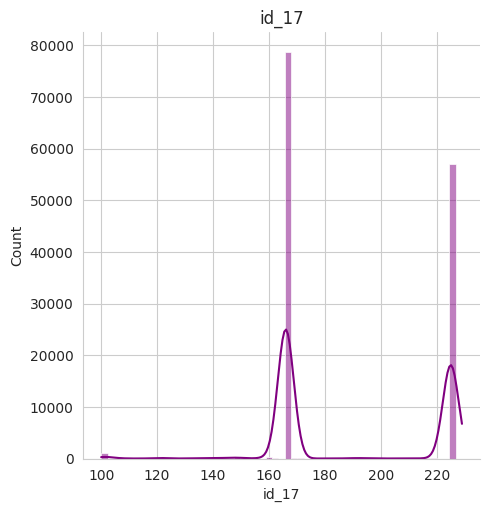

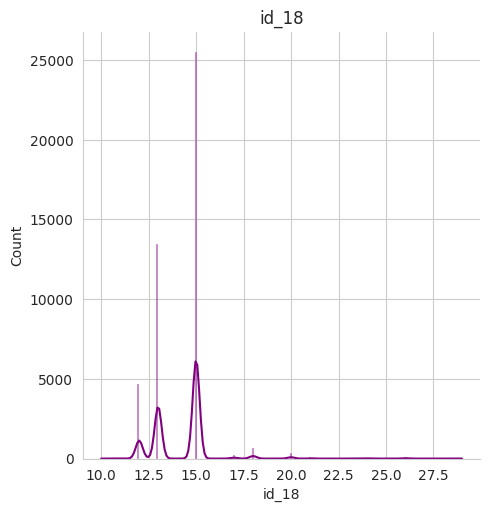

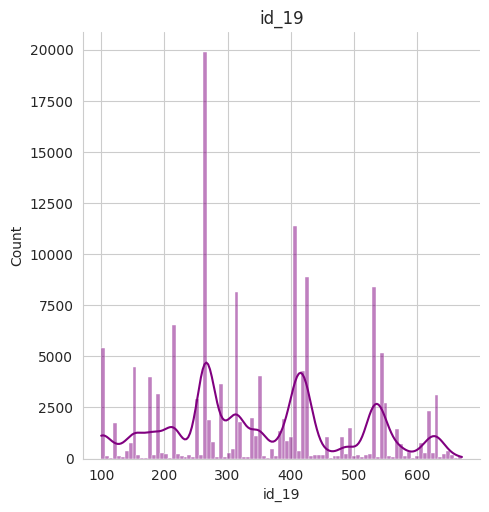

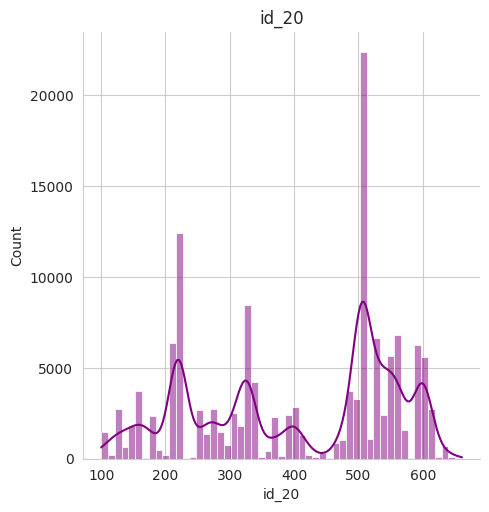

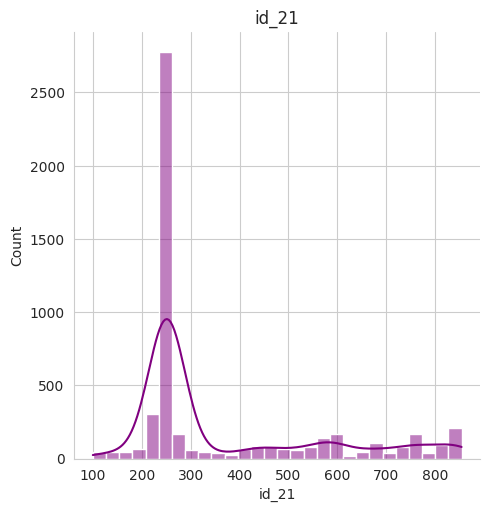

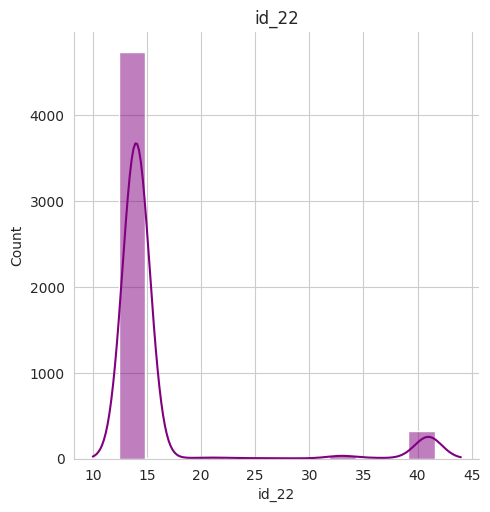

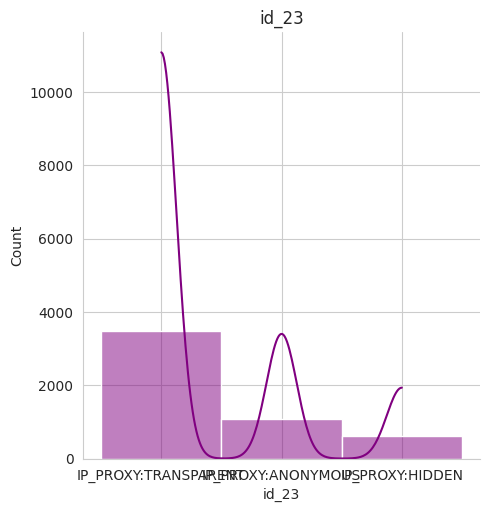

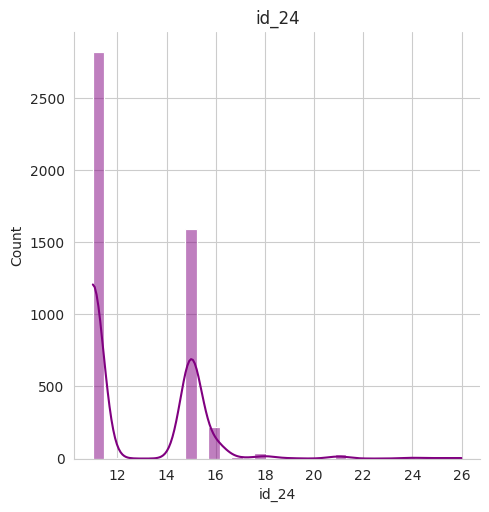

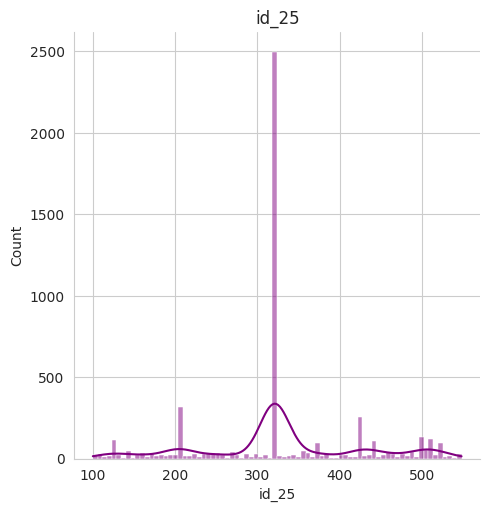

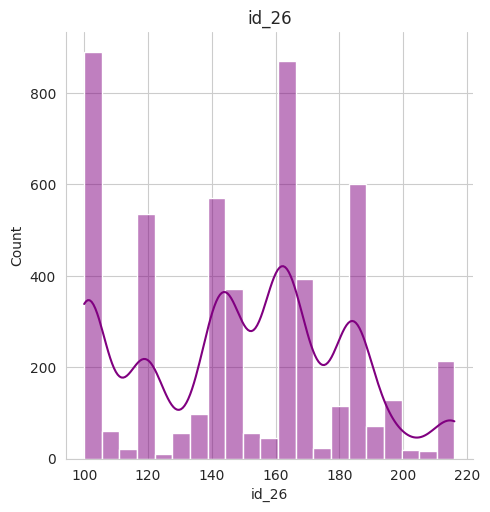

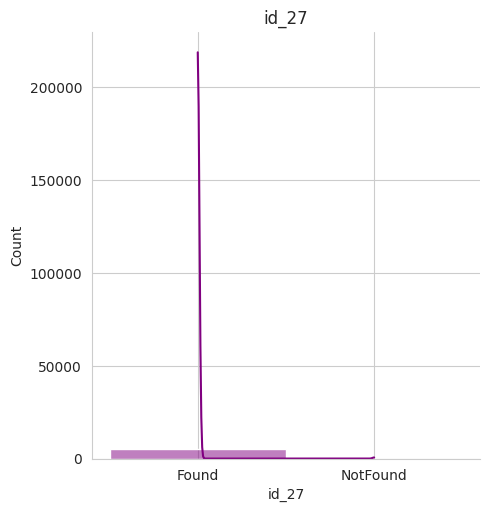

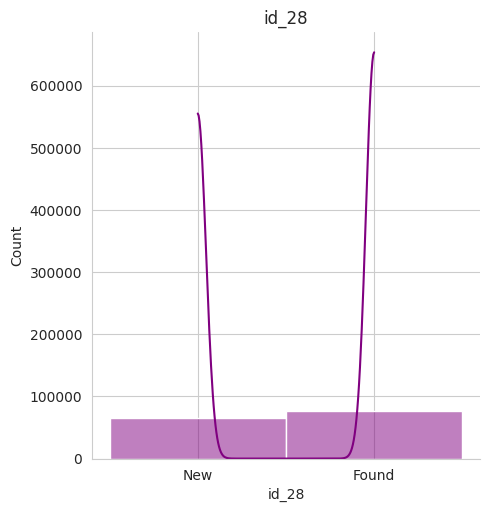

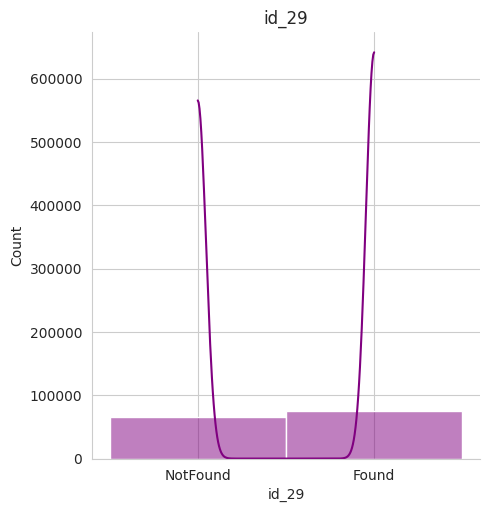

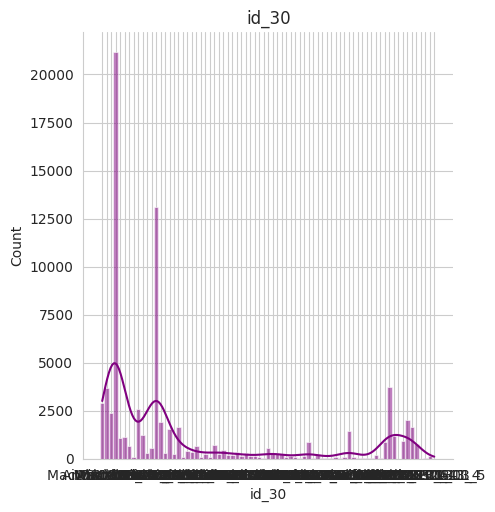

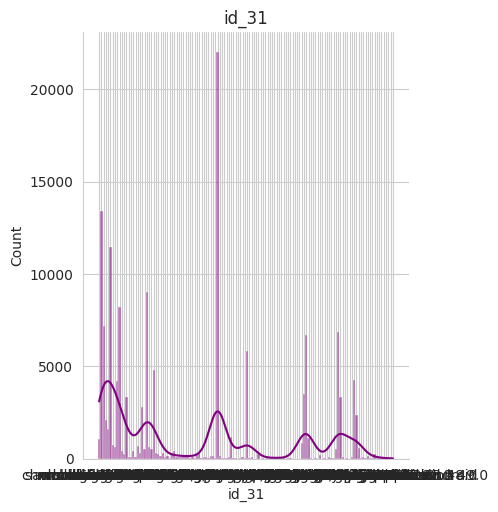

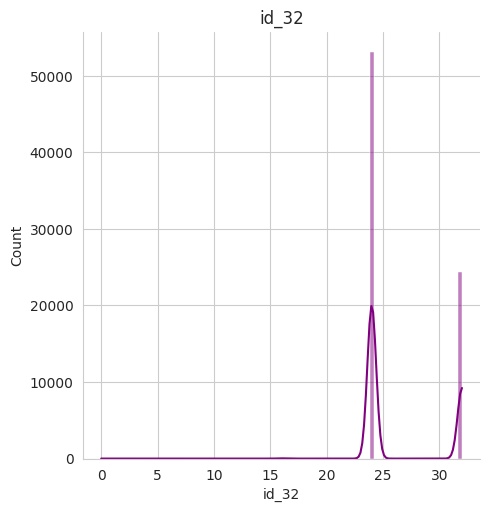

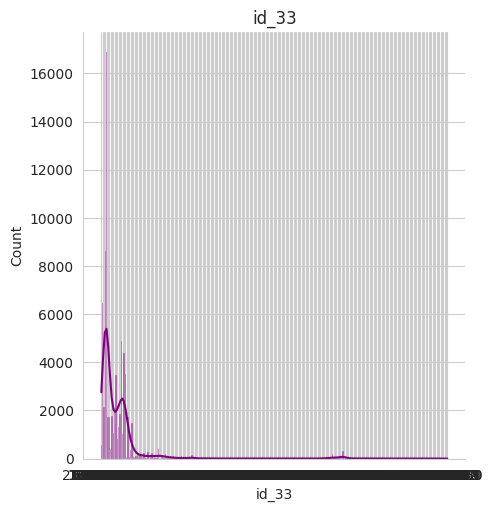

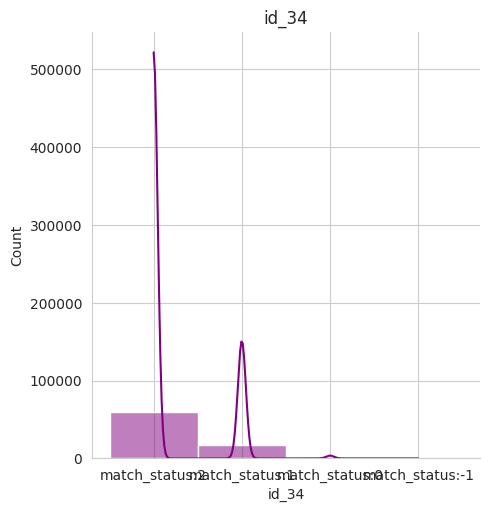

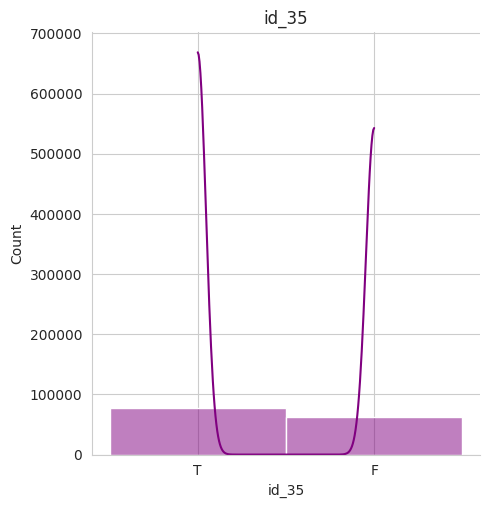

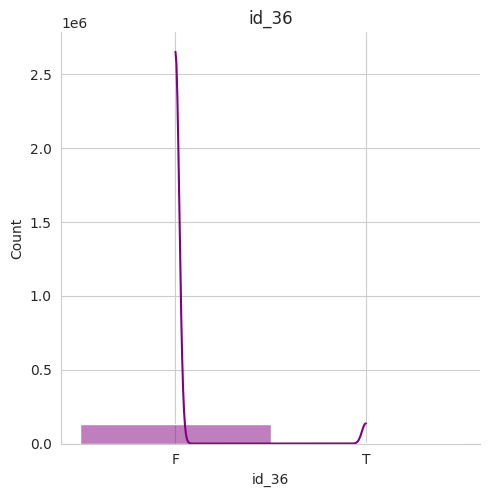

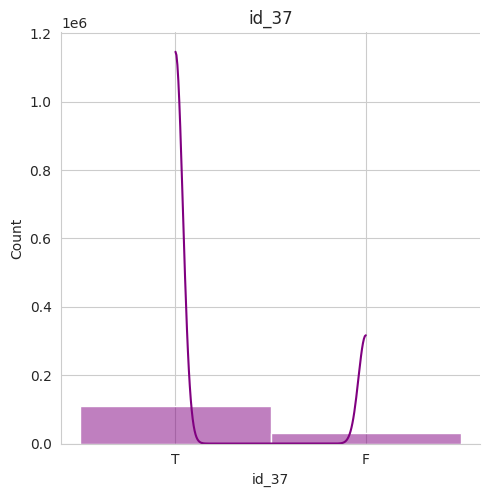

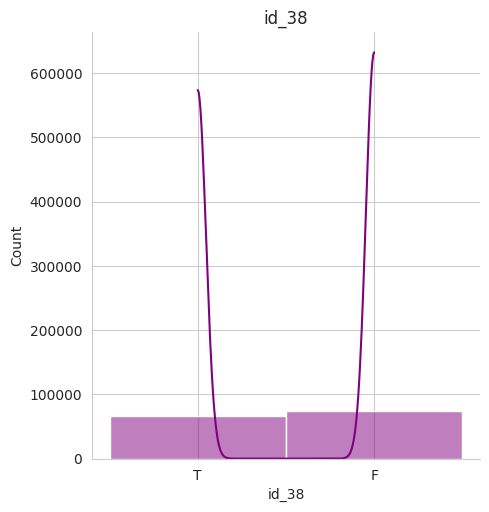

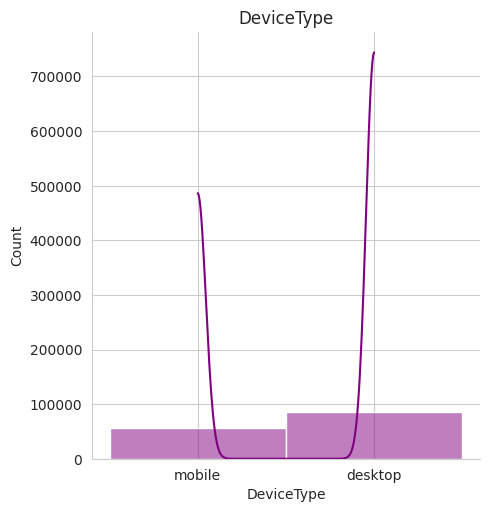

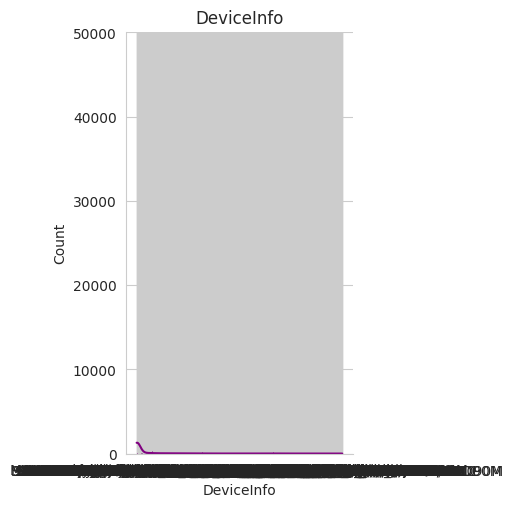

In [ ]:
#check distribution of each feature
sns.set_style("whitegrid")
for col in data.columns:
    sns.displot(data[col], kde=True, color='purple')
    plt.title(col)
    plt.show()

In [ ]:
# scale all numeric columns excpt transaction ID

# Create StandardScaler object
scaler = StandardScaler()
# list of numerical cols for scaling
num_cols = data.dtypes[data.dtypes == "float64"].index.values.tolist()
#print(num_cols)

# Normalize column data using fit_transform method
data[num_cols] = pd.DataFrame(scaler.fit_transform(data[num_cols]))

# Print normalized dataframe
#print(data)

        TransactionID     id_01     id_02     id_03     id_04     id_05  \
0             2987004  0.708850 -0.650979       NaN       NaN       NaN   
1             2987008  0.360366 -0.474607       NaN       NaN -0.307740   
2             2987010  0.360366  0.105946 -0.100613  0.084076 -0.307740   
3             2987011  0.360366  0.295115       NaN       NaN -0.307740   
4             2987016  0.708850 -1.047637 -0.100613  0.084076 -0.117258   
...               ...       ...       ...       ...       ...       ...   
144228        3577521 -0.336600 -0.180153 -0.100613  0.084076 -0.307740   
144229        3577526  0.360366 -0.016646       NaN       NaN -0.117258   
144230        3577529 -0.685083  2.866651       NaN       NaN -0.498222   
144231        3577531  0.360366 -0.746556 -0.100613  0.084076 -0.307740   
144232        3577534 -2.427498  1.031557       NaN       NaN -2.212561   

           id_06  id_07  id_08     id_09  ...                    id_31  \
0            NaN    NaN  

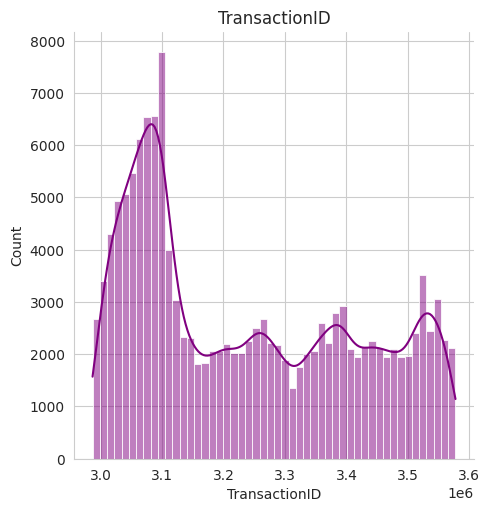

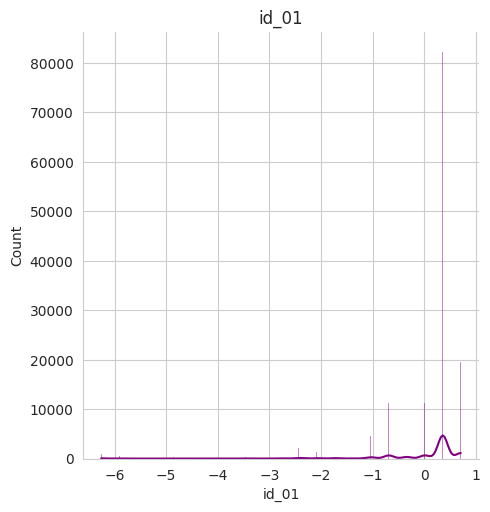

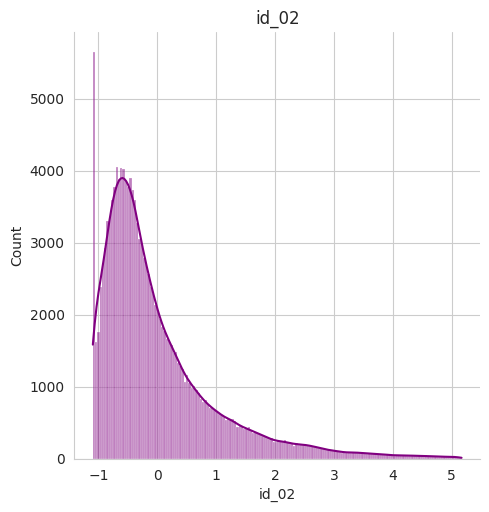

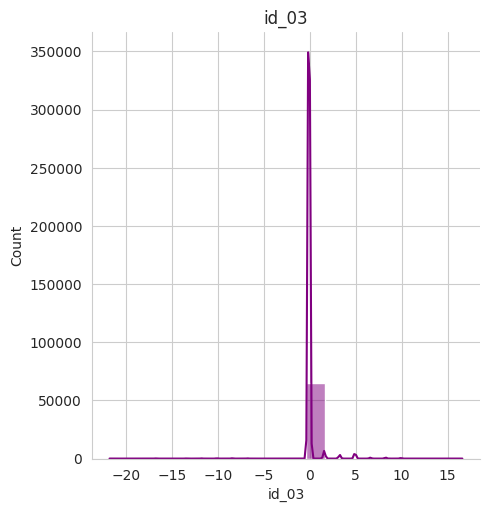

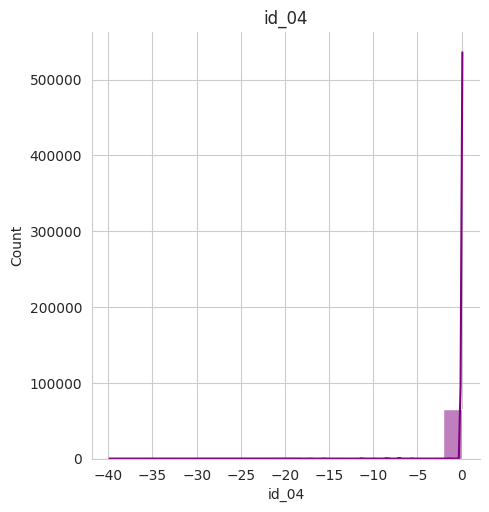

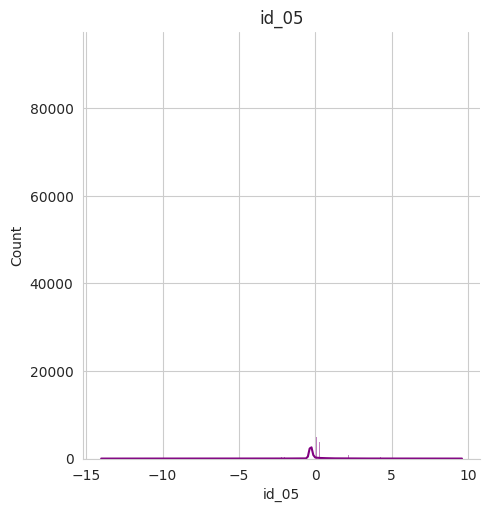

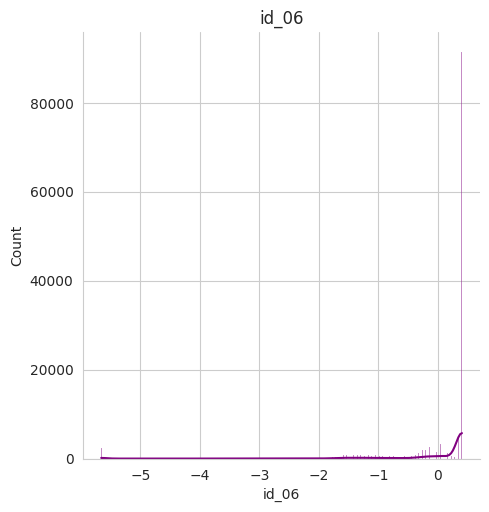

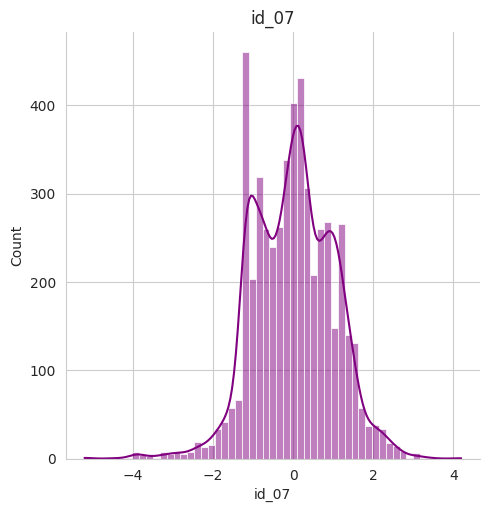

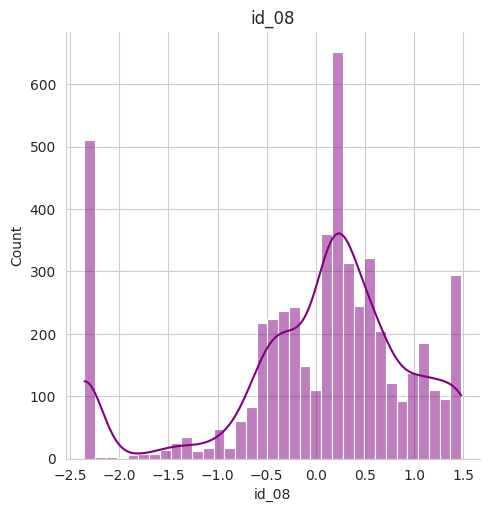

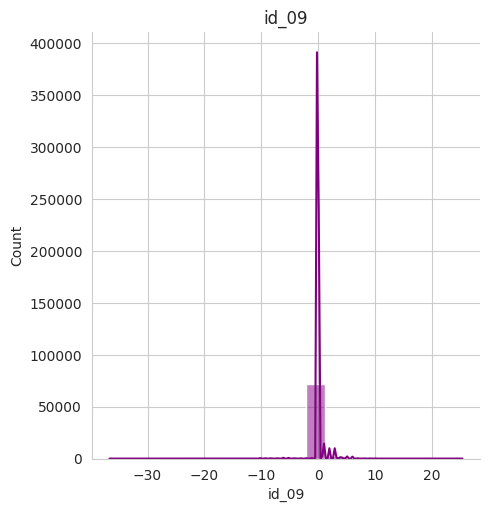

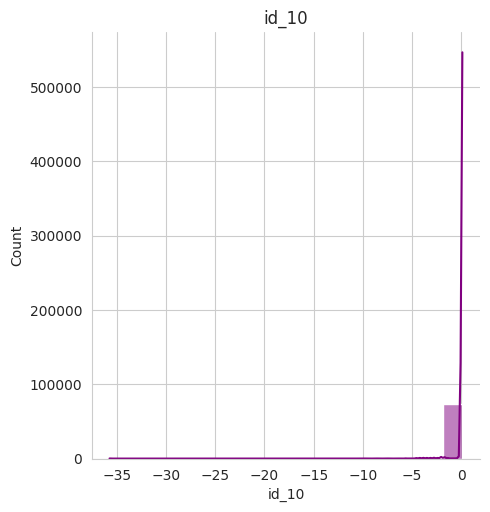

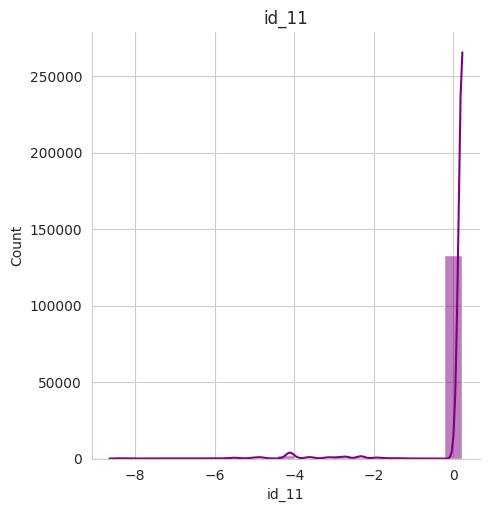

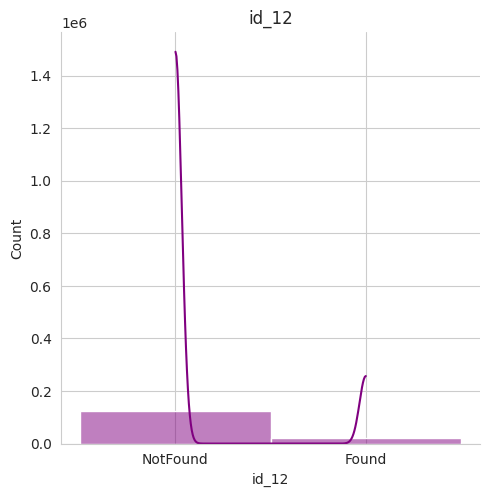

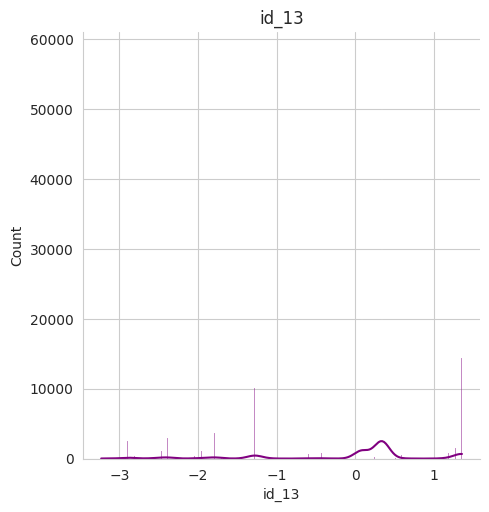

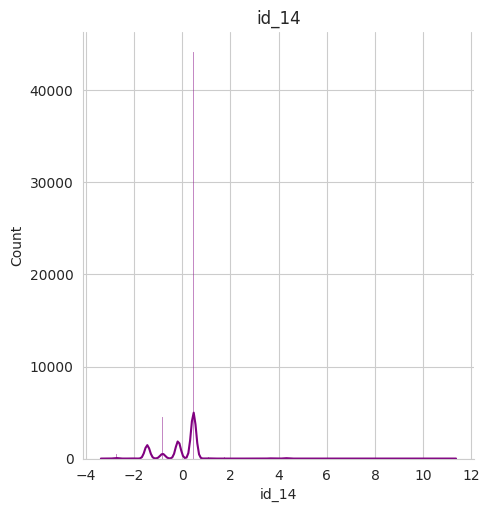

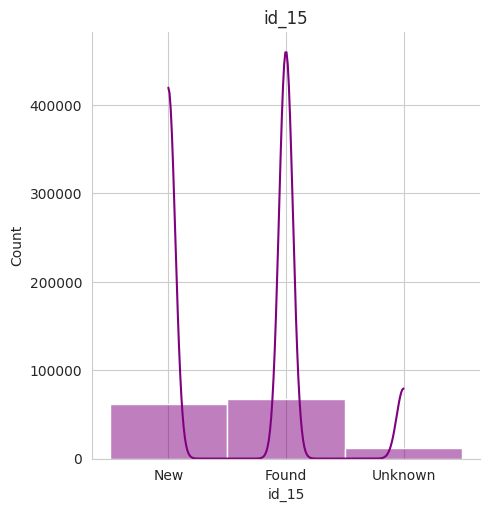

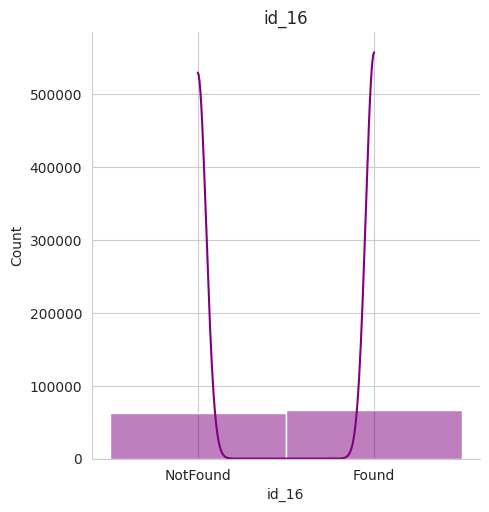

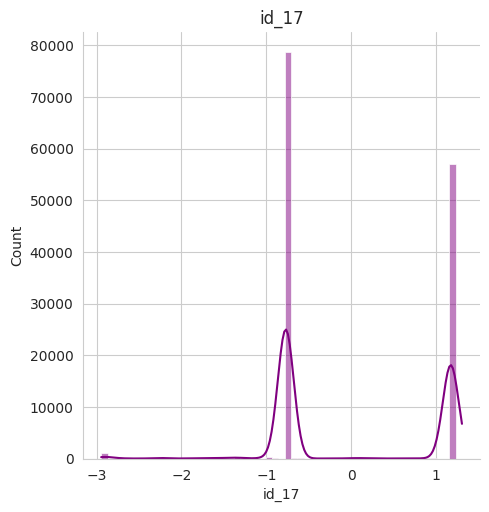

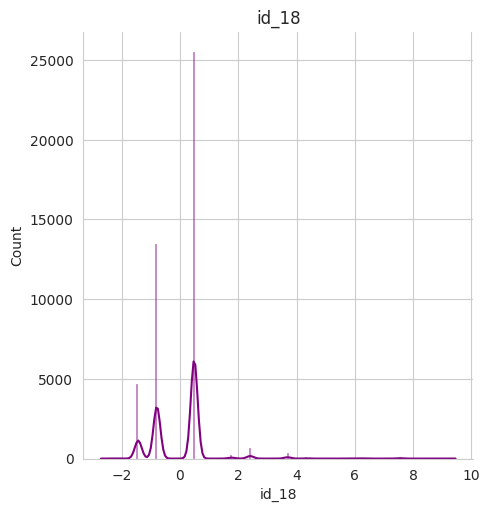

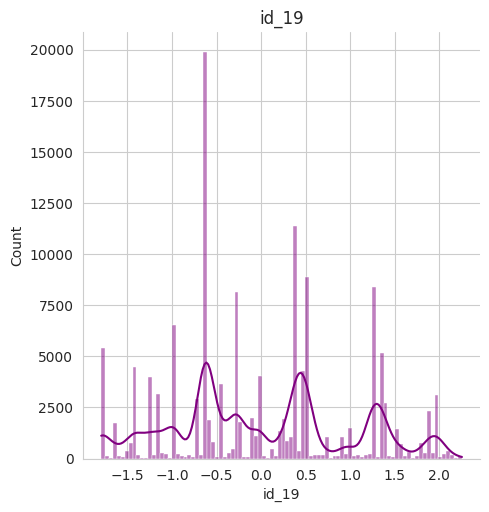

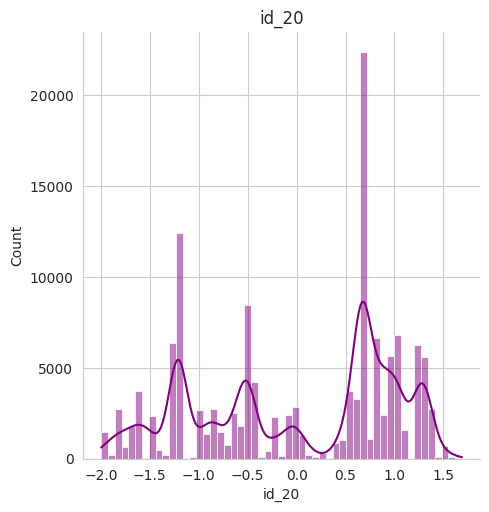

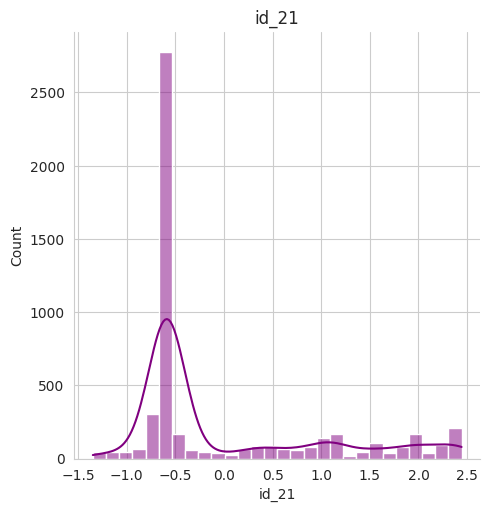

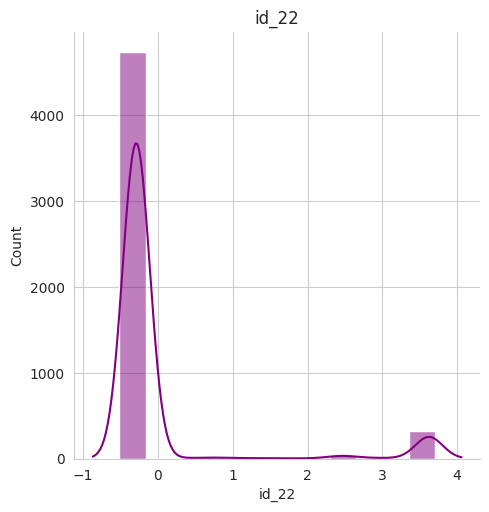

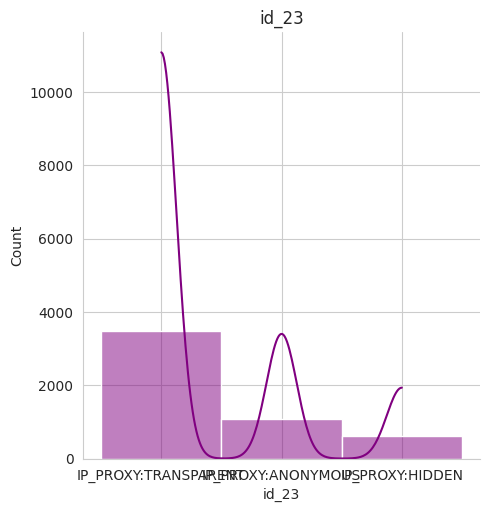

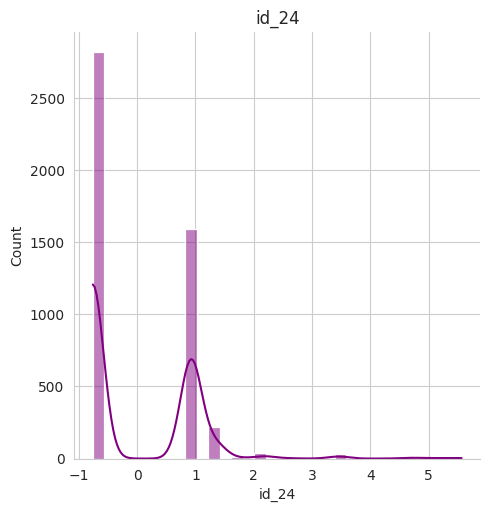

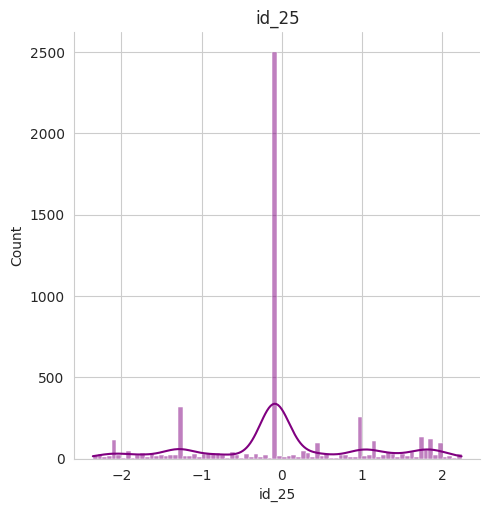

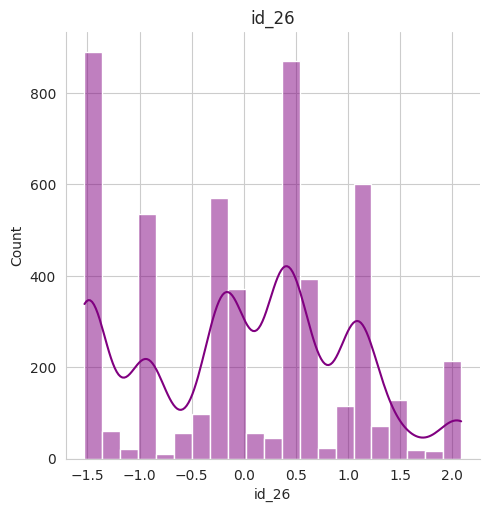

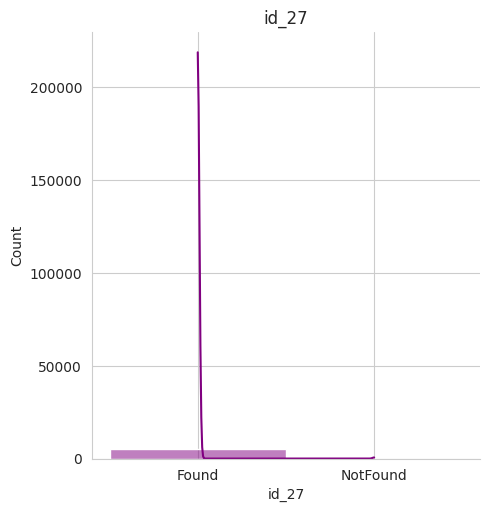

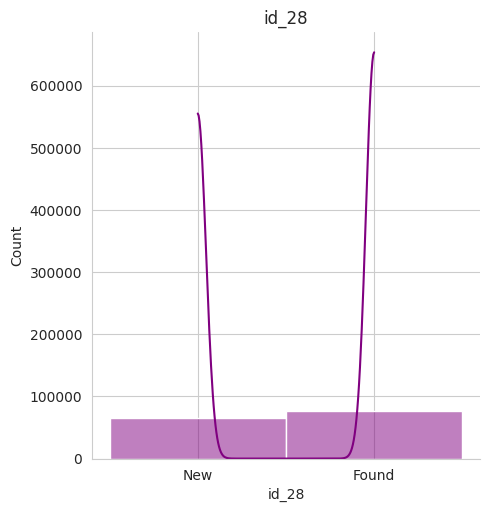

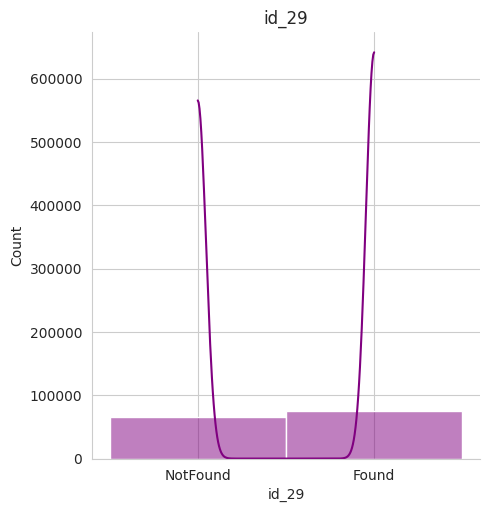

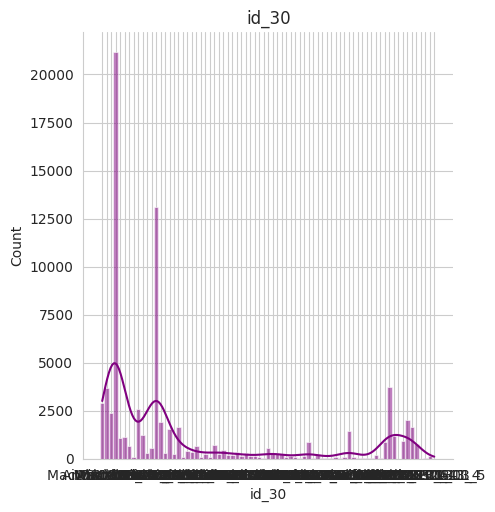

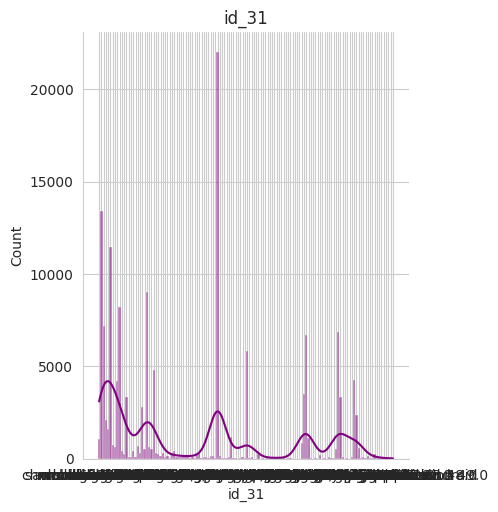

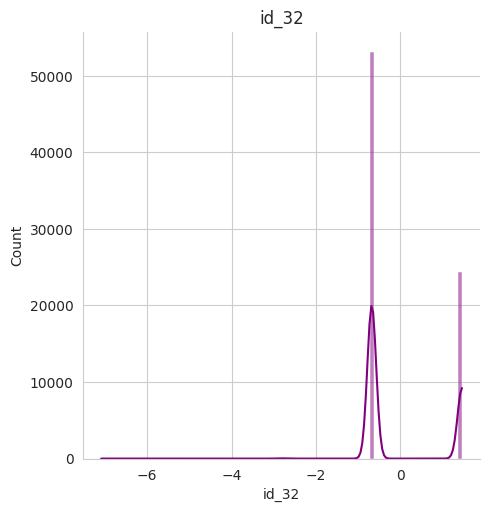

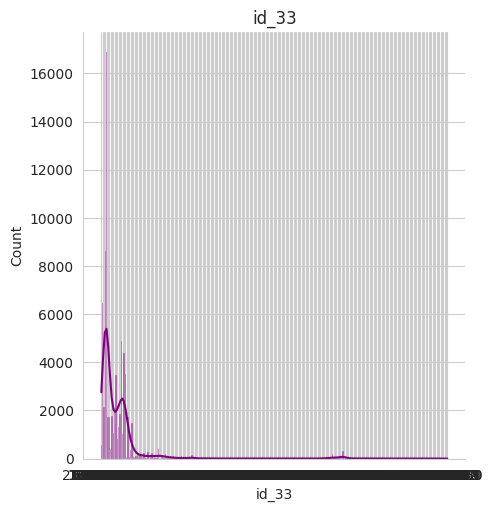

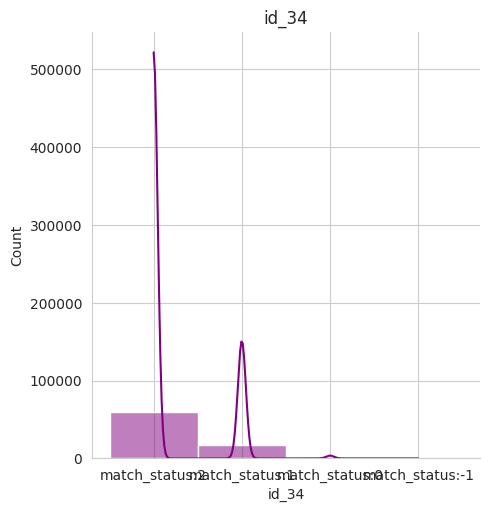

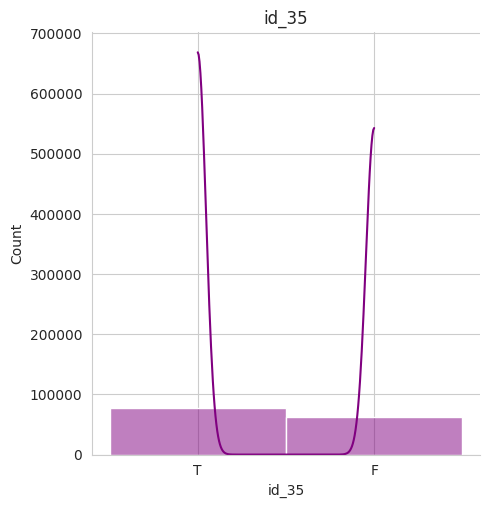

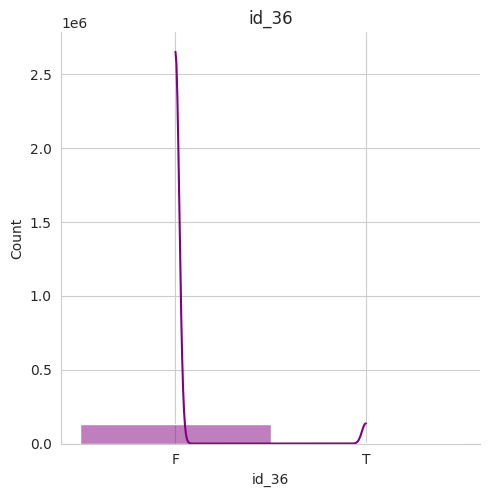

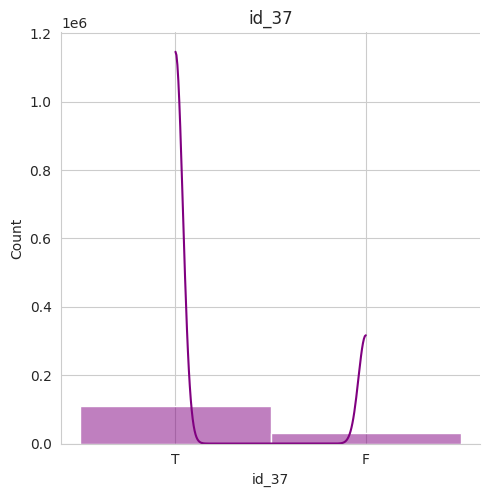

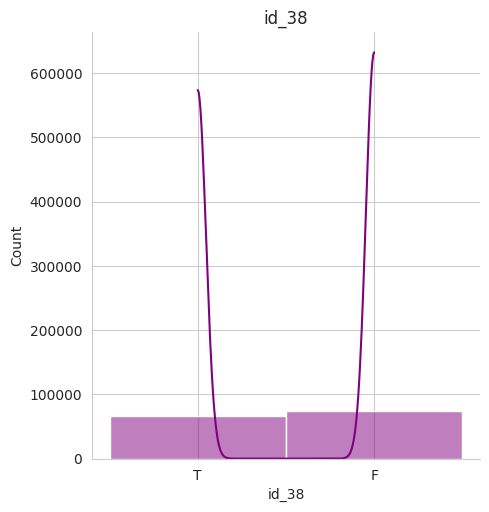

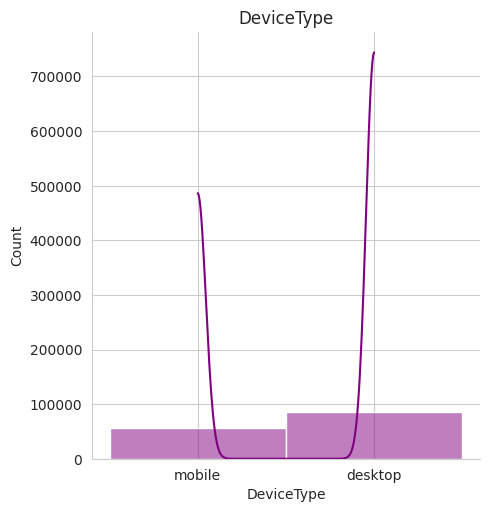

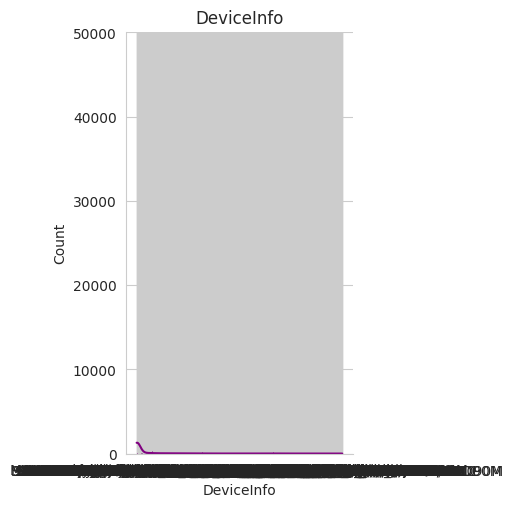

In [ ]:
#check distribution again
#check distribution of each feature
sns.set_style("whitegrid")
for col in data.columns:
    sns.displot(data[col], kde=True, color='purple')
    plt.title(col)
    plt.show()

In [ ]:
# analysis all object types of data
obj_df = data.select_dtypes(include=['object']).copy()


In [ ]:
obj_df.head()

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,NotFound,New,NotFound,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,NotFound,New,NotFound,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,NotFound,Found,Found,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,F,F,T,T,desktop,Windows
3,NotFound,New,NotFound,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,F,F,T,T,desktop,NaN
4,NotFound,Found,Found,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
# treatment decisions

In [ ]:
# id_12,15,16,30,31,33,34,35,38 , devicetype , device info is good. any nan make unknown cat
# id 15 is good. any nan make unknown
#id 28,29 is less number of data, but keep and make unknown
obj_df["id_23"].value_counts() # data is so less on IP Proxy, we will drop the column, or make category unknwn

IP_PROXY:TRANSPARENT    3489
IP_PROXY:ANONYMOUS      1071
IP_PROXY:HIDDEN          609
Name: id_23, dtype: int64

In [ ]:
data = data.fillna({"id_12": "UNKNOWN"})
data = data.fillna({"id_15": "UNKNOWN"})
data = data.fillna({"id_16": "UNKNOWN"})
data = data.fillna({"id_30": "UNKNOWN"})
data = data.fillna({"id_31": "UNKNOWN"})
data = data.fillna({"id_33": "UNKNOWN"})
data = data.fillna({"id_34": "UNKNOWN"})
data = data.fillna({"id_35": "UNKNOWN"})
data = data.fillna({"id_38": "UNKNOWN"})
data = data.fillna({"id_28": "UNKNOWN"})
data = data.fillna({"id_29": "UNKNOWN"})
data = data.fillna({"id_23": "UNKNOWN"})
data = data.fillna({"DeviceType": "UNKNOWN"})
data = data.fillna({"DeviceInfo": "UNKNOWN"})

In [ ]:
data.isnull().values.any()

True

In [ ]:
obj_df["id_27"].value_counts() # data is so less on id 27, we will drop the column

Found       5155
NotFound      14
Name: id_27, dtype: int64

In [ ]:
#dropping id_27
data.drop(columns=['id_27'])

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.708850,-0.650979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,1.46928,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0.360366,-0.474607,NaN,NaN,-0.307740,0.103008,NaN,NaN,NaN,...,mobile safari 11.0,1.46928,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0.360366,0.105946,-0.100613,0.084076,-0.307740,0.406203,NaN,NaN,-0.092519,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0.360366,0.295115,NaN,NaN,-0.307740,0.042369,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.708850,-1.047637,-0.100613,0.084076,-0.117258,0.406203,NaN,NaN,-0.092519,...,chrome 62.0,-0.67120,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-0.336600,-0.180153,-0.100613,0.084076,-0.307740,0.406203,NaN,NaN,-0.092519,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,0.360366,-0.016646,NaN,NaN,-0.117258,0.103008,NaN,NaN,NaN,...,chrome 55.0 for android,1.46928,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-0.685083,2.866651,NaN,NaN,-0.498222,-1.776800,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,0.360366,-0.746556,-0.100613,0.084076,-0.307740,-0.018270,NaN,NaN,-0.092519,...,chrome 66.0,-0.67120,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [ ]:
obj_df["id_36"].value_counts() # make nans 'F'

F    134066
T      6919
Name: id_36, dtype: int64

In [ ]:
data = data.fillna({"id_36": "F"})

In [ ]:
obj_df1 = data.select_dtypes(include=['object']).copy()
obj_df1["id_36"].value_counts()

F    137314
T      6919
Name: id_36, dtype: int64

In [ ]:
obj_df["id_37"].value_counts() # make nana 'T"

T    110452
F     30533
Name: id_37, dtype: int64

In [ ]:
data = data.fillna({"id_37": "T"})

In [ ]:
obj_df2 = data.select_dtypes(include=['object']).copy()
obj_df2["id_37"].value_counts()

T    113700
F     30533
Name: id_37, dtype: int64

In [ ]:
obj_df["DeviceInfo"].value_counts() # 

Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
               ...  
LGMS345            1
verykool           1
XT1072             1
LG-H931            1
0PJA2              1
Name: DeviceInfo, Length: 1786, dtype: int64

In [ ]:
obj_df3 = data.select_dtypes(include=['object']).copy()
obj_df3.head()

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,NotFound,New,NotFound,UNKNOWN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,NotFound,New,NotFound,UNKNOWN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,NotFound,Found,Found,UNKNOWN,NaN,Found,Found,UNKNOWN,chrome 62.0,UNKNOWN,UNKNOWN,F,F,T,T,desktop,Windows
3,NotFound,New,NotFound,UNKNOWN,NaN,New,NotFound,UNKNOWN,chrome 62.0,UNKNOWN,UNKNOWN,F,F,T,T,desktop,UNKNOWN
4,NotFound,Found,Found,UNKNOWN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
obj_df3.to_csv(relpath +'identity_object_values.csv') # this file just shows the values of categorical features/

In [ ]:
data.to_csv(relpath +'identity_training_file_clean_Features.csv') #This file has col id_27 deleted, all numerical features standard_scaled, all object featuresnan handled to unknown or F or T

In [ ]:
import pandas as pd
datatrx = pd.read_csv(relpath + "train_transaction.csv")
datatrx



,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
datatrx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [ ]:
datatrx.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [ ]:
data.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


Transaction Table

1.   Transaction DT: timedelta from a given reference datetime (not actual time stamp). first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.
2.   TransactionAMT: transaction payment amount in USD. 
3.   ProductCD: CATEGORICAL: product code, the product for each transaction. it can be product or service.
4.   card1 - card6: CATEGORICAL: payment card information, such as card type, card category, issue bank, country, etc.
5.   addr1: CATEGORICAL: address - billing region, of purchaser
6.   addr2: CATEGORICAL: address - billing country, of purchaser
6.   dist: distance
7.   P_ emaildomain: CATEGORECAL: purchaser and recipient email domain
8.   R__emaildomain:CATEGORECAL:  purchaser and recipient email domain. Maybe null when transacion does not require a receipient.
8.   C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked. this could be counts of phone numbers, email addresses, names associated with the user, devices,ipaddr,billingaddr. they  may be for purchaser and receipient.
9.   D1-D15: timedelta, such as days between previous transaction,time since last used,or first time used etc.
10.  M1-M9: CATEGORECAL: match, such as names on card and address, etc.
11.  Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations. All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking).  For eg. How many times the payment card associated with a IP and emailI or address apperared in 24 hrs range etc.  wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying

Identity table:
1.   Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
DeviceType
DeviceInfo
id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately. do not consider values like -100 as NAN in id_06,id_08 etc.
id_12 - id_38 : id 14 is timezone

Labelling logic
The logic of our labeling is define reported chargeback on the card as fraud transaction (isFraud=1) and transactions posterior to it with either user account, email address or billing address directly linked to these attributes as fraud too. If none of above is reported and found beyond 120 days, then we define as legit transaction (isFraud=0).
However, in real world fraudulent activity might not be reported, e.g. cardholder was unaware, or forgot to report in time and beyond the claim period, etc. In such cases, supposed fraud might be labeled as legit, but we never could know of them. Thus, we think they're unusual cases and negligible portion." Read more : https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#588953





In [ ]:
for col, values in data.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 144233
[2987004 2987008 2987010 ... 3577529 3577531 3577534]


id_01: 77
[   0.   -5.  -15.  -10.  -20.  -40.  -30.  -25.  -55.  -45.  -70.  -90.
 -100.  -65.  -60.  -75.  -72.  -50.  -21.  -35.  -85.  -64.  -80.  -95.
  -87.  -58.   -7.  -12.  -11.   -9.  -27.  -42.   -6.  -62.  -18.  -76.
  -23.  -19.  -99.  -13.  -26.  -31.  -17.  -22.  -14.  -34.  -54.  -53.
  -28.  -88.  -16.  -61.  -46.  -94.  -24.  -93.  -44.  -89.  -92.  -37.
  -96.  -57.  -29.  -33.  -32.   -8.  -52.  -43.  -38.  -86.  -47.  -82.
  -48.  -63.  -71.  -56.  -51.]


id_02: 115655
[ 70787.  98945. 191631. ... 172059. 632381.  55528.]


id_03: 24
[ nan   0.   3.   2.   5.   1.   6.   9.   4.  -5.  -9.  -2.  -4.  -1.
  -3.  -7.  -6. -11.   7.  -8.  10. -10.   8. -12. -13.]


id_04: 15
[ nan   0. -11.  -5.  -8.  -1.  -6.  -9.  -3. -13.  -4. -10.  -7. -12.
  -2. -28.]


id_05: 93
[ nan   0.   1.   3.   2.   9.  12.   6.   4.  21.   7.   5.  18.  17.
  -1.  11.   8.  10. -10.  -8.  40.  13.  19.  -3.  14